# **BitCoin Price Prediction**

-------------

## **Objective**

The objective of this project is to predict the price of Bitcoin using a Decision Tree Regression model. We will leverage historical Bitcoin price data to train our model and evaluate its performance in forecasting future price trends.

## **Data Source**

https://github.com/YBI-Foundation/Dataset/raw/main/BitcoinPricePrediction.csv

## **Import Library**

In [20]:
import pandas as pd

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [28]:
bitCoin_price = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/BitcoinPricePrediction.csv")

## **Describe Data**

In [29]:
bitCoin_price.describe()

,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,mining_profitability,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
count,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000,3.093000e+03,3.093000e+03,3093.000000,...,3.093000e+03,3093.000000,3093.000000,3093.000000,3.093000e+03,3093.000000,3093.000000,3.093000e+03,3.093000e+03,3093.000000
mean,7478.787423,7704.451859,7228.984028,7494.347559,212004.408018,644307.604591,315140.438733,5.416214e+12,3.923394e+19,211.641951,...,5.289076e+04,350.846155,35889.309787,44.134386,4.917852e+05,17.890455,4.084758,1.591747e+07,1.054620e+07,7509.615584
std,12404.192142,12790.358177,11965.543777,12425.151723,102204.862259,273438.916788,152655.587696,7.181598e+12,5.172006e+19,1003.429879,...,1.223717e+05,459.933644,30663.425155,56.718282,2.617263e+05,2.384311,5.462011,2.255772e+06,1.320106e+07,12445.065991
min,68.400000,75.000000,50.000000,68.400000,30170.000000,76067.000000,30829.000000,6.695826e+06,5.181545e+13,0.063700,...,8.893450e+02,0.091700,7300.000000,3.821000,4.840200e+04,13.144000,0.183000,1.097528e+07,3.099004e+05,68.400000
25%,427.100000,435.300000,417.100000,427.300000,106160.000000,410596.000000,173768.000000,4.764340e+10,3.506746e+17,0.241000,...,4.389000e+03,110.480000,18727.000000,8.707000,2.362800e+05,15.458000,0.718000,1.416458e+07,1.458738e+06,427.600000
50%,2541.600000,2617.500000,2472.400000,2545.400000,229295.000000,730092.000000,335962.000000,7.086595e+11,5.168519e+18,0.776000,...,1.559100e+04,206.481000,25897.000000,29.850000,5.161620e+05,18.639000,1.447000,1.640969e+07,5.461151e+06,2558.400000
75%,8820.100000,9040.300000,8610.800000,8821.600000,296817.000000,880952.000000,428831.000000,9.985348e+12,7.263994e+19,2.719000,...,3.674800e+04,453.410000,39572.772727,49.354000,6.728410e+05,19.834000,5.547000,1.786376e+07,1.478203e+07,8829.200000
max,63544.200000,64778.000000,62067.500000,63540.900000,490459.000000,998092.000000,730199.000000,2.504649e+13,1.976095e+20,13352.000000,...,1.932378e+06,5417.000000,363566.000000,616.867000,1.196069e+06,22.081000,43.580000,1.881966e+07,8.017224e+07,63540.900000


## **Data Visualization**

<Axes: >

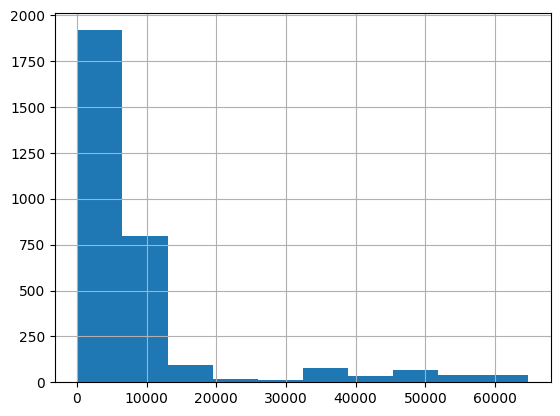

In [47]:
bitCoin_price['highest_price'].hist()

<Axes: >

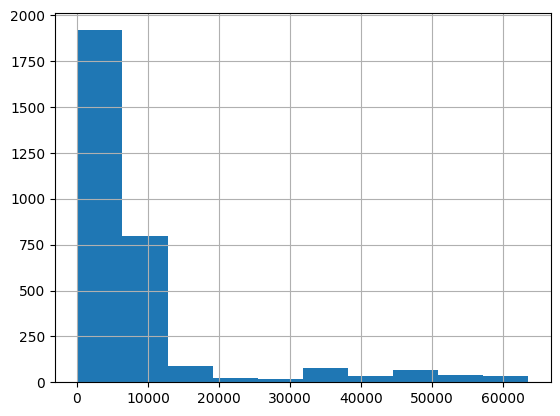

In [48]:
bitCoin_price['opening_price'].hist()

<Axes: >

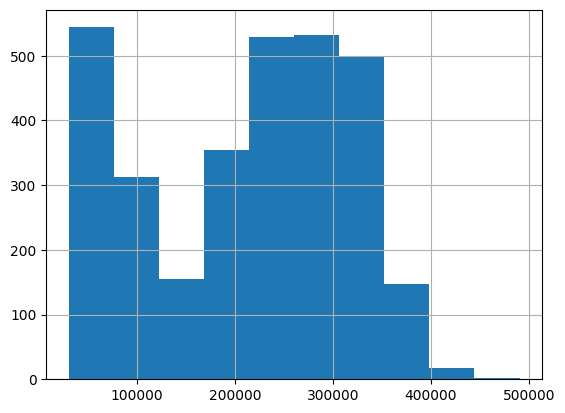

In [49]:
bitCoin_price['transactions_in_blockchain'].hist()

<Axes: >

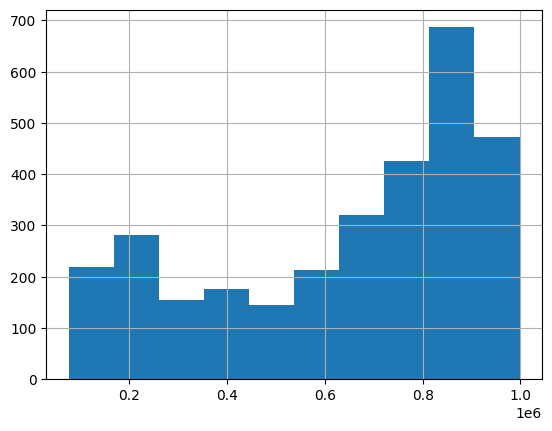

In [50]:
bitCoin_price['avg_block_size'].hist()

<Axes: >

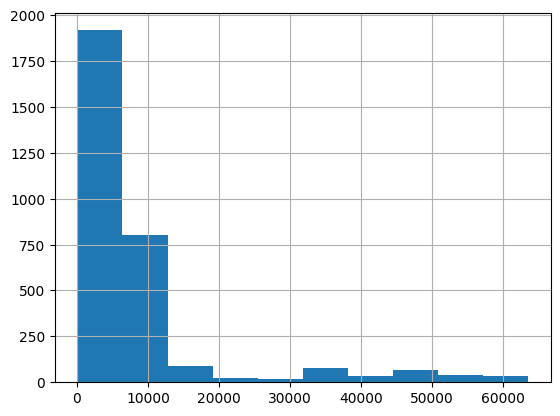

In [51]:
bitCoin_price['next_day_closing_price'].hist()

In [30]:
bitCoin_price.head()

,Date,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price
0,2013-04-01,93.0,106.0,92.2,104.0,52572,139256,48809,6695826,6.550211e+13,...,2592.0,64.987,8193.0,15.248,75756.0,19.962,0.867,10975275.0,481891.360000,118.0
1,2013-04-02,104.0,118.4,99.0,118.0,63095,175443,62276,6695826,6.184560e+13,...,4400.0,94.955,8193.0,17.192,91875.0,20.024,1.338,10988125.0,531299.503749,135.0
2,2013-04-03,118.0,147.0,110.0,135.0,63766,184209,69174,6695826,6.027037e+13,...,4478.0,102.533,8193.0,26.608,107142.0,19.987,1.596,10986575.0,538423.880210,132.1
3,2013-04-04,135.0,142.1,116.4,132.1,66738,221568,71753,6695826,5.527246e+13,...,4249.0,123.314,8193.0,24.681,108890.0,19.990,1.948,10995725.0,525157.600000,142.3
4,2013-04-05,132.1,144.9,130.2,142.3,61215,190067,69310,7005058,5.181545e+13,...,4348.0,125.183,8193.0,20.514,100034.0,19.833,1.432,10999925.0,606454.781556,142.6


In [31]:
bitCoin_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            3093 non-null   object 
 1   opening_price                   3093 non-null   float64
 2   highest_price                   3093 non-null   float64
 3   lowest_price                    3093 non-null   float64
 4   closing_price                   3093 non-null   float64
 5   transactions_in_blockchain      3093 non-null   int64  
 6   avg_block_size                  3093 non-null   int64  
 7   sent_by_adress                  3093 non-null   int64  
 8   avg_mining_difficulty           3093 non-null   int64  
 9   avg_hashrate                    3093 non-null   float64
 10  mining_profitability            3093 non-null   float64
 11  sent_coins_in_usd               3093 non-null   int64  
 12  avg_transaction_fees            30

In [32]:
bitCoin_price.shape

(3093, 25)

## **Data Preprocessing**

In [33]:
bitCoin_price.drop(['Date', 'avg_transaction_fees', 'median_transaction_fees', 'top100_to_total_percentage', 'avg_fee_to_reward'],axis=1,inplace=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [34]:
bitCoin_price.columns

Index(['opening_price', 'highest_price', 'lowest_price', 'closing_price',
       'transactions_in_blockchain', 'avg_block_size', 'sent_by_adress',
       'avg_mining_difficulty', 'avg_hashrate', 'mining_profitability',
       'sent_coins_in_usd', 'avg_block_time', 'avg_transaction_value',
       'median_transaction_value', 'tweets', 'google_trends',
       'active_addresses', 'number_of_coins_in_circulation', 'miner_revenue',
       'next_day_closing_price'],
      dtype='object')

In [35]:
y = bitCoin_price['highest_price']
x = bitCoin_price[['opening_price', 'lowest_price', 'closing_price',
       'transactions_in_blockchain', 'avg_block_size', 'sent_by_adress',
       'avg_mining_difficulty', 'avg_hashrate', 'mining_profitability',
       'sent_coins_in_usd', 'avg_block_time', 'avg_transaction_value',
       'median_transaction_value', 'tweets', 'google_trends',
       'active_addresses', 'number_of_coins_in_circulation', 'miner_revenue',
       'next_day_closing_price']]

## **Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=2529)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((927, 19), (2166, 19), (927,), (2166,))

## **Modeling**

In [38]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

## **Model Evaluation**

In [39]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

## **Prediction**

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_pred

array([ 7400.3,   273.1,   235.3, ...,  9274.8, 49191.8,  2676. ])

In [42]:
# finding accuracy of this model using mean absolute percentange error
from sklearn.metrics import mean_absolute_percentage_error
error_percent = mean_absolute_percentage_error(y_test,y_pred)
accuracy = 1 - error_percent
print(accuracy*100)


97.23004235791213


## **Explaination**

This program aims to predict Bitcoin prices using a Decision Tree Regression model. Here's a breakdown:

1. **Data**:

    The dataset is loaded from a CSV file hosted on GitHub.
    It contains various features like opening price, closing price, transaction volume, etc.

2. **Exploration**:

    The data is explored using functions like describe(), head(), tail(), and info() to understand its structure and characteristics.

3. **Preprocessing**:

    Missing values are checked using isnull().sum().
    The dataset is split into target variable (y - highest price) and feature variables (x - all other columns).

4. **Model Training**:

    The data is split into training and testing sets using train_test_split().
    A Decision Tree Regression model is created and trained on the training data.

5. **Prediction and Evaluation**:

    Predictions are made on the test data.
    The model's accuracy is evaluated using mean absolute percentage error.

In essence, the notebook demonstrates machine learning workflow for predicting Bitcoin prices using historical data.